# Quiron database

In [1]:
import os
import csv
import numpy as np # linear algebra
import pandas as pd # df processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # df visualization library  
import matplotlib.pyplot as plt

In [2]:
ROOT= os.getcwd()
print('You are here: \n<<'+str(ROOT)+'>>')

You are here: 
<</home/lasito/Downloads>>


In [45]:
df= pd.read_csv(os.path.join(ROOT,'clevelandFinal.csv'), header=0)
df_label = df['num']
df_features = df.drop('num')
#df.set_index('patient_ID', inplace=True) # patient_ID shall be the index for our dfframe
#df.index= pd.MultiIndex.from_arrays(df[['patient_ID', 'finding_number']].values.T, names=['ID', 'finding'])
#df.set_index('patient_ID', inplace=True) 
df#.head()

id  ccf  age  sex  cp  trestbps  htn  chol  cigs  years  ...  laddist  \
0      1    0   63    1   1       145    1   233  50.0   20.0  ...        1   
1      2    0   67    1   4       160    1   286  40.0   40.0  ...        2   
2      3    0   67    1   4       120    1   229  20.0   35.0  ...        1   
3      4    0   37    1   3       130    0   250   0.0    0.0  ...        1   
4      6    0   41    0   2       130    1   204   0.0    0.0  ...        1   
..   ...  ...  ...  ...  ..       ...  ...   ...   ...    ...  ...      ...   
277  294    0   39    0   3       138    1   220  20.0   23.0  ...        1   
278  295    0   57    1   2       154    0   232  40.0   35.0  ...        1   
279  296    0   58    0   4       130    1   197   0.0    0.0  ...        1   
280  297    0   57    1   4       110    1   335  20.0   15.0  ...        1   
281  298    0   47    1   3       130    1   253   0.0    0.0  ...        1   

     cxmain  om1  rcaprox  rcadist  lvx1  lvx2  lvx3  lvx4  lvf  
0         1    1        1        1     1     1     1     1    1  
1         2    1        1        1     1     1     1     1    1  
2         1    1        2        2     1     1     1     7    3  
3         1    1        1        1     1     1     1     1    1  
4         1    1        1        1     1     1     1     1    1  
..      ...  ...      ...      ...   ...   ...   ...   ...  ...  
277       1    1        1        1     1     1     1     1    2  
278       2    1        1        1     1     1     1     1    1  
279       1    1        1        1     1     1     1     1    1  
280       1    2        1        2     1     1     1     1    1  
281       1    1        1        1     1     1     1     1    1  

[282 rows x 55 columns]

##  FEATURE ENGINEERING

157 50 32 31 12


/home/lasito/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


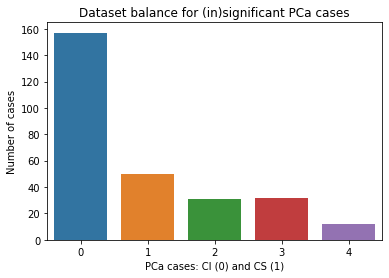

In [47]:
y=df['num'].tolist()
y_df=pd.DataFrame({'diagnosis':y})
ax = sns.countplot(y,label="Number of cases")       # M (1) = 56, B (0) = 18
ax.set_title('Dataset balance for (in)significant PCa cases')
ax.set_xlabel('PCa cases: CI (0) and CS (1)')
ax.set_ylabel('Number of cases')
y_0, y_1, y_2, y_3, y_4 = y_df.value_counts()
print(y_0, y_1,y_2,y_3,y_4)

Number of Benign (CI):  157
Number of Malignant (CS) :  125


/home/lasito/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


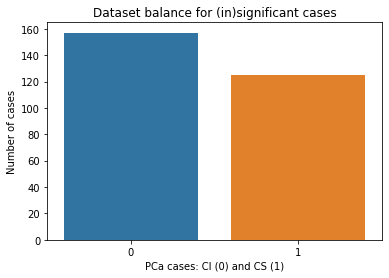

In [49]:
df.loc[df['num'] > 0, 'num'] = 1
y=df['num'].tolist()
y_df=pd.DataFrame({'diagnosis':y})
ax = sns.countplot(y,label="Number of cases")       # M (1) = 56, B (0) = 18
ax.set_title('Dataset balance for (in)significant cases')
ax.set_xlabel('PCa cases: CI (0) and CS (1)')
ax.set_ylabel('Number of cases')
y_cs, y_ci = y_df.value_counts()
print('Number of Benign (CI): ', y_cs)
print('Number of Malignant (CS) : ', y_ci)

In [51]:
df.describe()

id    ccf         age         sex          cp    trestbps  \
count  282.000000  282.0  282.000000  282.000000  282.000000  282.000000   
mean   151.517730    0.0   54.411348    0.677305    3.163121  131.563830   
std     87.131234    0.0    9.053083    0.468338    0.955405   17.757496   
min      1.000000    0.0   29.000000    0.000000    1.000000   94.000000   
25%     75.250000    0.0   48.000000    0.000000    3.000000  120.000000   
50%    151.500000    0.0   55.000000    1.000000    3.000000  130.000000   
75%    227.750000    0.0   61.000000    1.000000    4.000000  140.000000   
max    298.000000    0.0   77.000000    1.000000    4.000000  200.000000   

              htn        chol        cigs       years  ...     laddist  \
count  282.000000  282.000000  282.000000  282.000000  ...  282.000000   
mean     0.617021  249.092199   16.939716   15.250000  ...    1.205674   
std      0.486977   51.217546   19.489068   15.353848  ...    0.404912   
min      0.000000  126.000000    0.000000    0.000000  ...    1.000000   
25%      0.000000  213.000000    0.000000    0.000000  ...    1.000000   
50%      1.000000  244.000000   10.000000   15.000000  ...    1.000000   
75%      1.000000  277.000000   30.000000   30.000000  ...    1.000000   
max      1.000000  564.000000   99.000000   54.000000  ...    2.000000   

           cxmain         om1     rcaprox     rcadist   lvx1   lvx2  \
count  282.000000  282.000000  282.000000  282.000000  282.0  282.0   
mean     1.156028    1.163121    1.173759    1.127660    1.0    1.0   
std      0.363527    0.370132    0.379576    0.334304    0.0    0.0   
min      1.000000    1.000000    1.000000    1.000000    1.0    1.0   
25%      1.000000    1.000000    1.000000    1.000000    1.0    1.0   
50%      1.000000    1.000000    1.000000    1.000000    1.0    1.0   
75%      1.000000    1.000000    1.000000    1.000000    1.0    1.0   
max      2.000000    2.000000    2.000000    2.000000    1.0    1.0   

             lvx3        lvx4        lvf  
count  282.000000  282.000000  282.00000  
mean     1.134752    1.411348    1.14539  
std      0.766002    1.439508    0.44257  
min      1.000000    1.000000    1.00000  
25%      1.000000    1.000000    1.00000  
50%      1.000000    1.000000    1.00000  
75%      1.000000    1.000000    1.00000  
max      8.000000    8.000000    4.00000  

[8 rows x 55 columns]

## Visualization

#### Violin plot (and Box plot (outliers))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'id'),
  Text(1, 0, 'ccf'),
  Text(2, 0, 'age'),
  Text(3, 0, 'sex'),
  Text(4, 0, 'cp'),
  Text(5, 0, 'trestbps'),
  Text(6, 0, 'htn'),
  Text(7, 0, 'chol'),
  Text(8, 0, 'cigs'),
  Text(9, 0, 'years'),
  Text(10, 0, 'fbs'),
  Text(11, 0, 'dm'),
  Text(12, 0, 'famhist'),
  Text(13, 0, 'restecg'),
  Text(14, 0, 'ekgmo'),
  Text(15, 0, 'ekgday'),
  Text(16, 0, 'ekgyr'),
  Text(17, 0, 'dig'),
  Text(18, 0, 'prop'),
  Text(19, 0, 'nitr'),
  Text(20, 0, 'pro'),
  Text(21, 0, 'diuretic'),
  Text(22, 0, 'proto'),
  Text(23, 0, 'thaldur'),
  Text(24, 0, 'thaltime')])

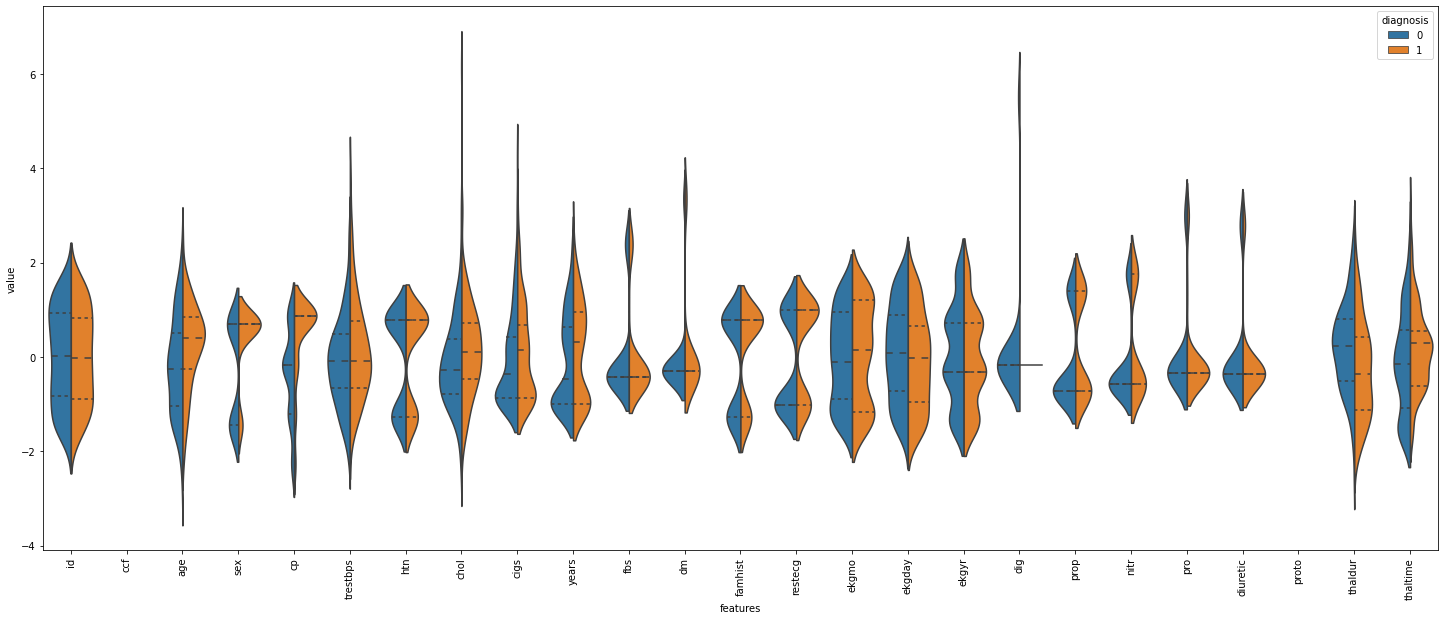

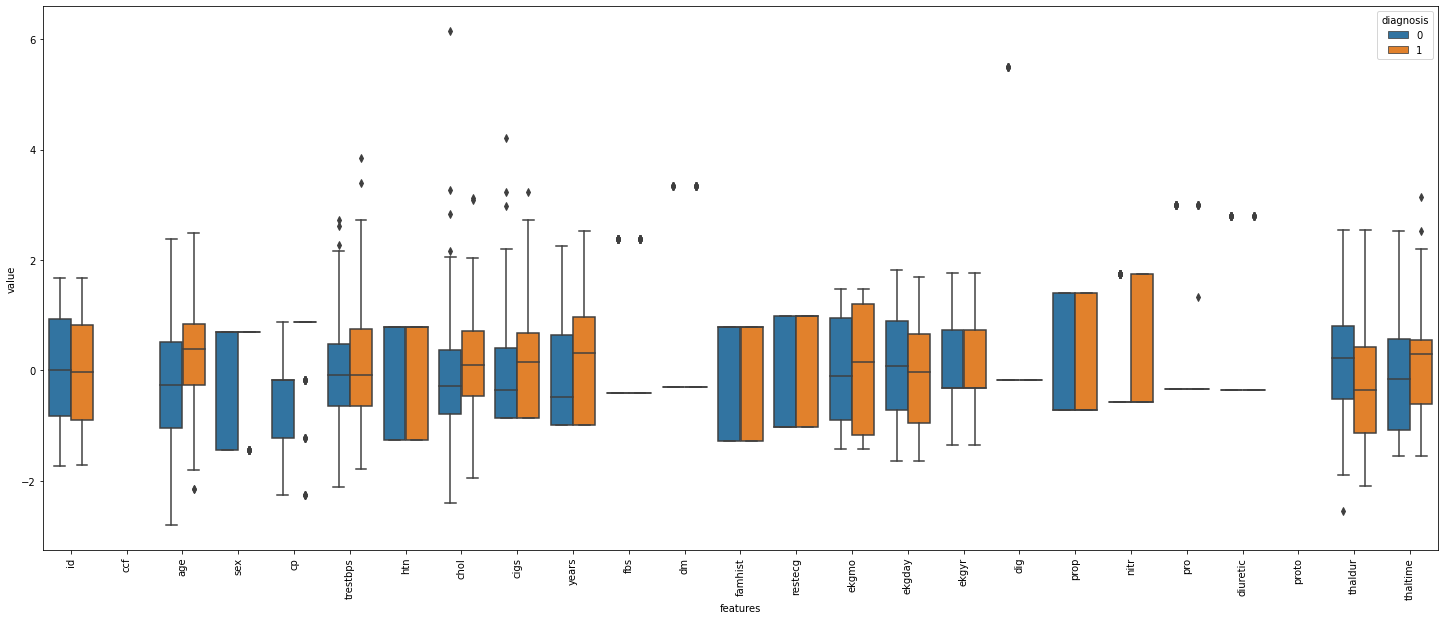

In [52]:
# first ten features
data_dia = y_df
data=df
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y_df,data_n_2.iloc[:,0:25]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(25,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

plt.figure(figsize=(25,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'met'),
  Text(1, 0, 'thalach'),
  Text(2, 0, 'thalrest'),
  Text(3, 0, 'tpeakbps'),
  Text(4, 0, 'tpeakbpd'),
  Text(5, 0, 'dummy'),
  Text(6, 0, 'trestbpd'),
  Text(7, 0, 'exang'),
  Text(8, 0, 'xhypo'),
  Text(9, 0, 'oldpeak'),
  Text(10, 0, 'slope'),
  Text(11, 0, 'rldv5e'),
  Text(12, 0, 'ca'),
  Text(13, 0, 'thal'),
  Text(14, 0, 'cmo'),
  Text(15, 0, 'cday'),
  Text(16, 0, 'cyr'),
  Text(17, 0, 'num'),
  Text(18, 0, 'lmt'),
  Text(19, 0, 'ladprox'),
  Text(20, 0, 'laddist'),
  Text(21, 0, 'cxmain'),
  Text(22, 0, 'om1'),
  Text(23, 0, 'rcaprox'),
  Text(24, 0, 'rcadist')])

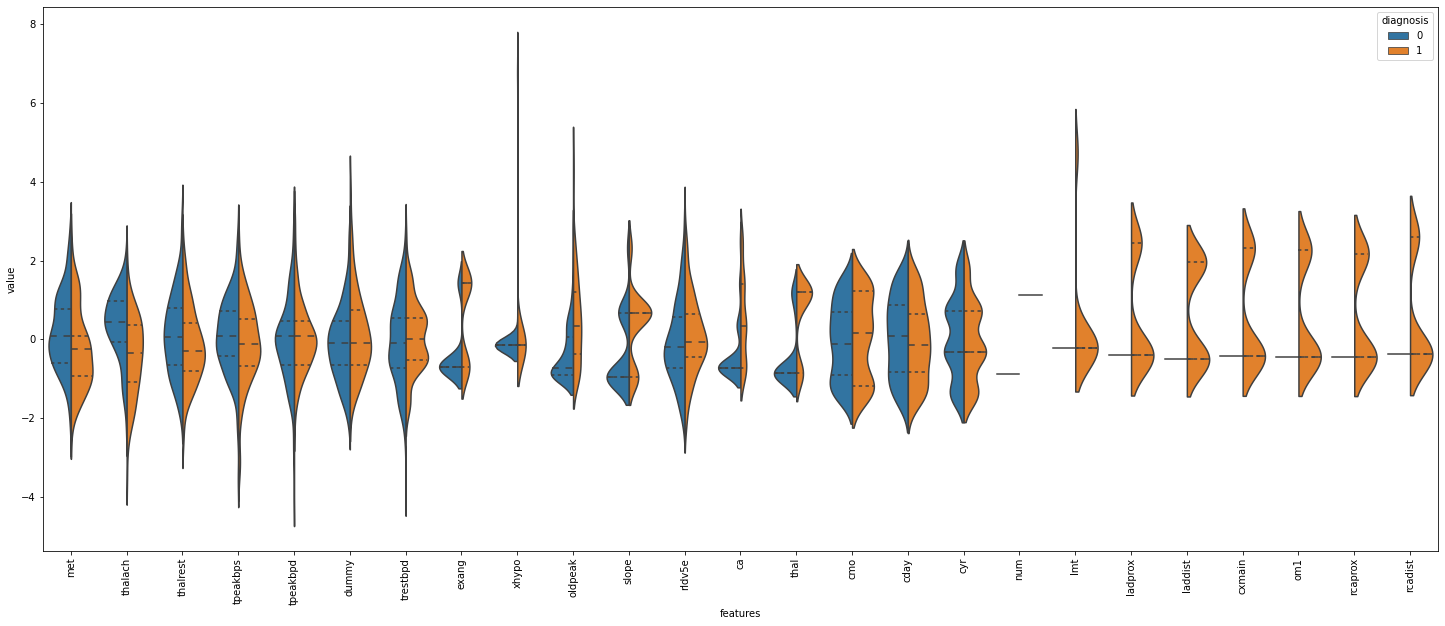

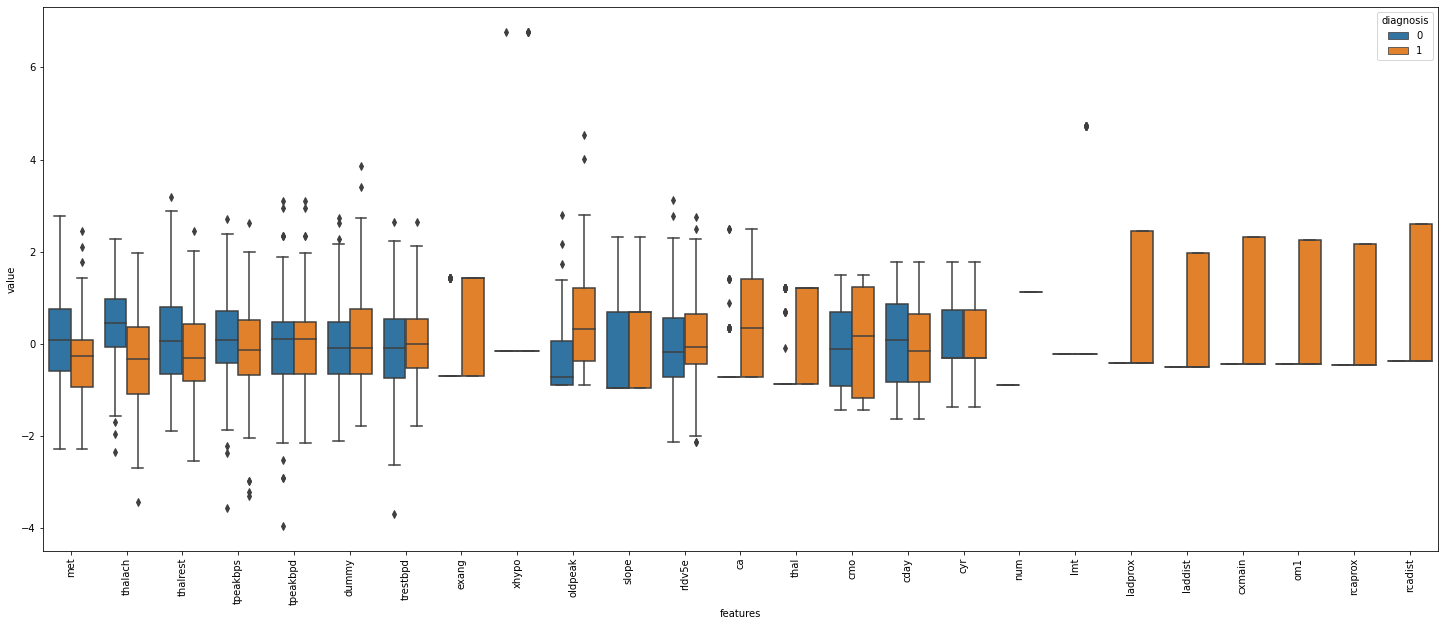

In [53]:
# Second ten features
data = pd.concat([y_df,data_n_2.iloc[:,25:50]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(25,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

plt.figure(figsize=(25,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'lvx1'),
  Text(1, 0, 'lvx2'),
  Text(2, 0, 'lvx3'),
  Text(3, 0, 'lvx4'),
  Text(4, 0, 'lvf')])

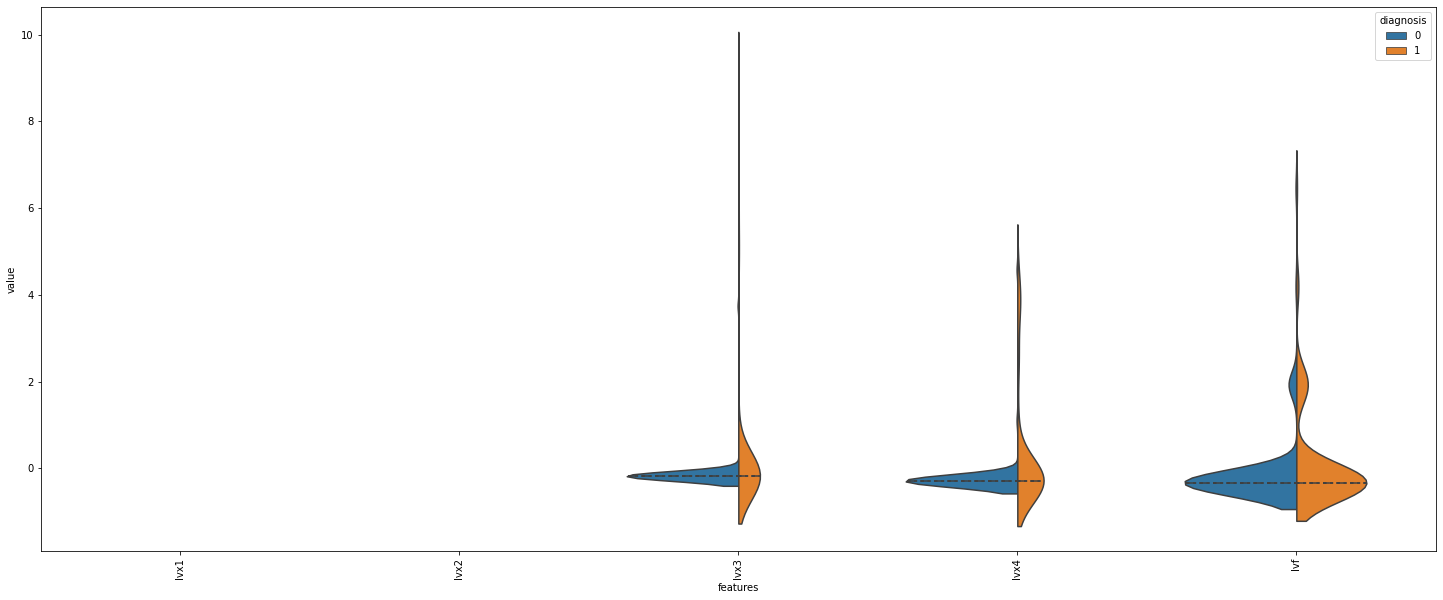

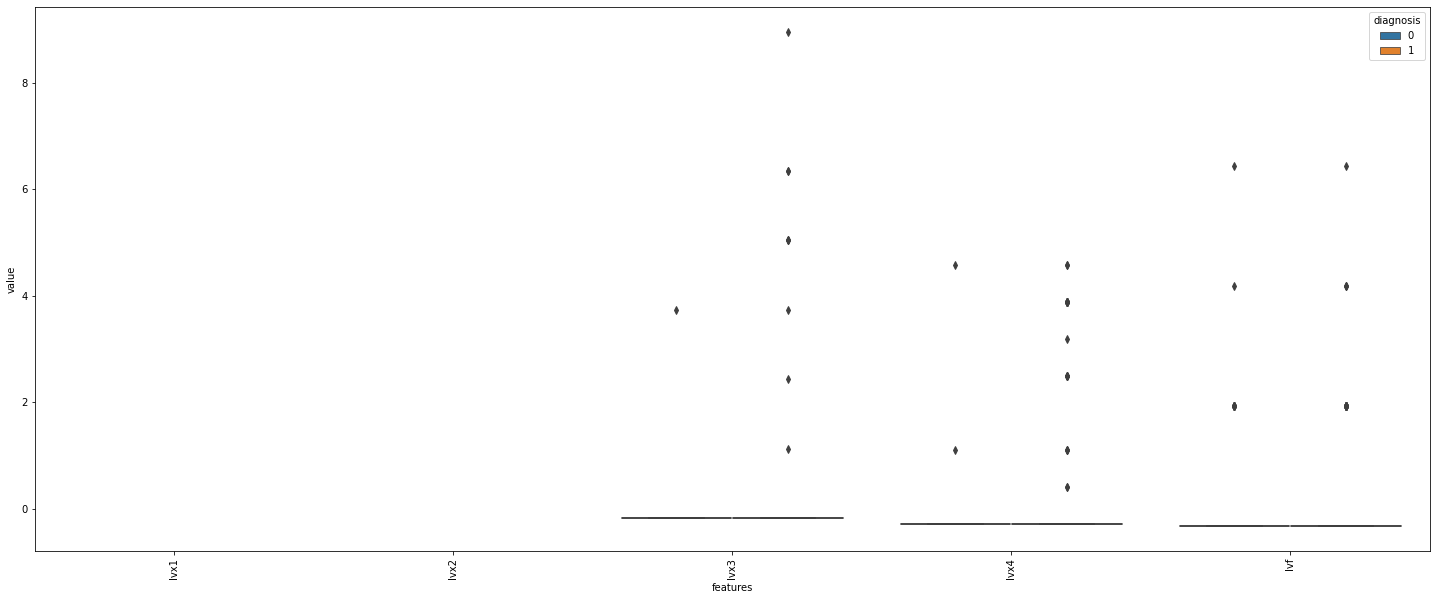

In [54]:
# Thrid ten features
data = pd.concat([y_df,data_n_2.iloc[:,50:75]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(25,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

plt.figure(figsize=(25,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

#### Swarm plot

In [59]:
import time
import warnings
warnings.filterwarnings("ignore")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'id'),
  Text(1, 0, 'ccf'),
  Text(2, 0, 'age'),
  Text(3, 0, 'sex'),
  Text(4, 0, 'cp'),
  Text(5, 0, 'trestbps'),
  Text(6, 0, 'htn'),
  Text(7, 0, 'chol'),
  Text(8, 0, 'cigs'),
  Text(9, 0, 'years'),
  Text(10, 0, 'fbs'),
  Text(11, 0, 'dm'),
  Text(12, 0, 'famhist'),
  Text(13, 0, 'restecg'),
  Text(14, 0, 'ekgmo'),
  Text(15, 0, 'ekgday'),
  Text(16, 0, 'ekgyr'),
  Text(17, 0, 'dig'),
  Text(18, 0, 'prop'),
  Text(19, 0, 'nitr'),
  Text(20, 0, 'pro'),
  Text(21, 0, 'diuretic'),
  Text(22, 0, 'proto'),
  Text(23, 0, 'thaldur'),
  Text(24, 0, 'thaltime')])

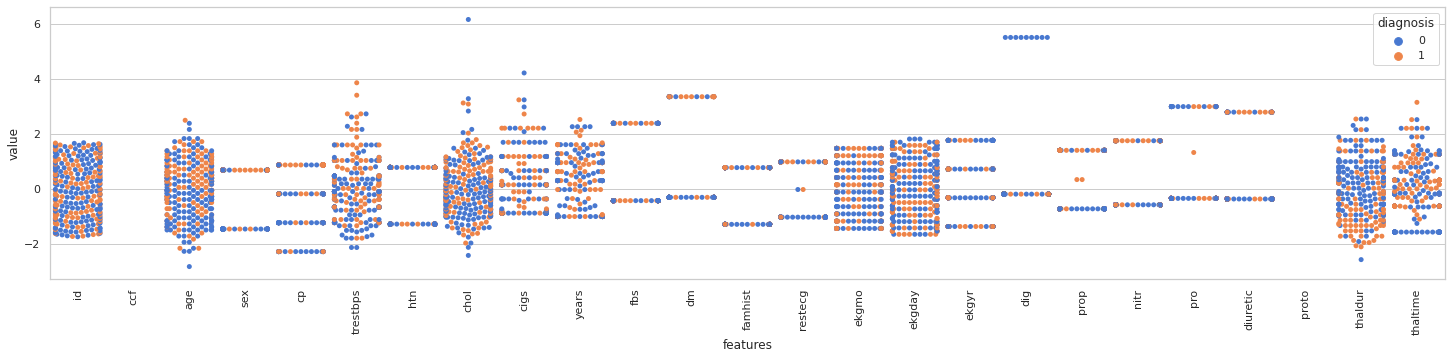

In [69]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = df
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y_df,data_n_2.iloc[:,0:25]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(25,5))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'met'),
  Text(1, 0, 'thalach'),
  Text(2, 0, 'thalrest'),
  Text(3, 0, 'tpeakbps'),
  Text(4, 0, 'tpeakbpd'),
  Text(5, 0, 'dummy'),
  Text(6, 0, 'trestbpd'),
  Text(7, 0, 'exang'),
  Text(8, 0, 'xhypo'),
  Text(9, 0, 'oldpeak'),
  Text(10, 0, 'slope'),
  Text(11, 0, 'rldv5e'),
  Text(12, 0, 'ca'),
  Text(13, 0, 'thal'),
  Text(14, 0, 'cmo'),
  Text(15, 0, 'cday'),
  Text(16, 0, 'cyr'),
  Text(17, 0, 'num'),
  Text(18, 0, 'lmt'),
  Text(19, 0, 'ladprox'),
  Text(20, 0, 'laddist'),
  Text(21, 0, 'cxmain'),
  Text(22, 0, 'om1'),
  Text(23, 0, 'rcaprox'),
  Text(24, 0, 'rcadist')])

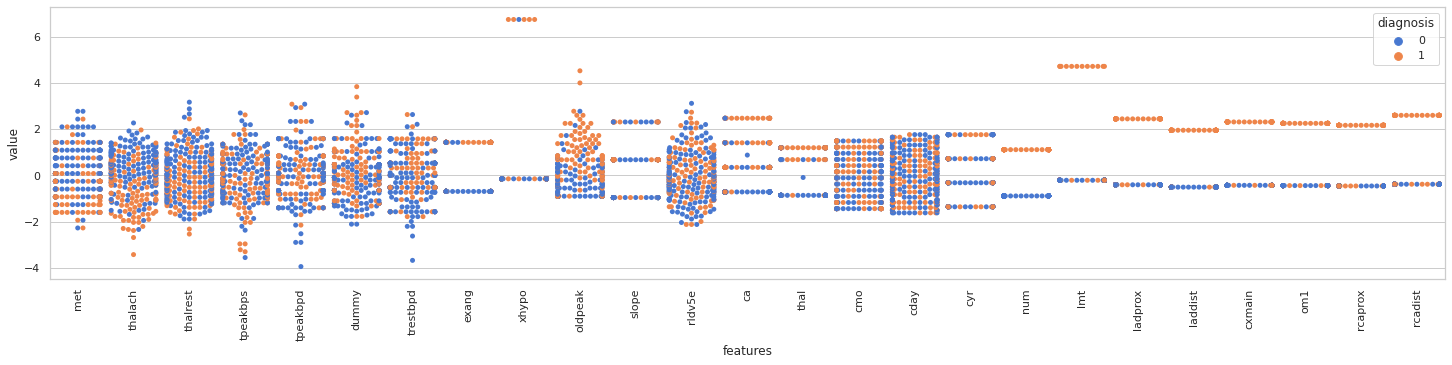

In [75]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = df
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y_df,data_n_2.iloc[:,25:50]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(25,5))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'lvx1'),
  Text(1, 0, 'lvx2'),
  Text(2, 0, 'lvx3'),
  Text(3, 0, 'lvx4'),
  Text(4, 0, 'lvf')])

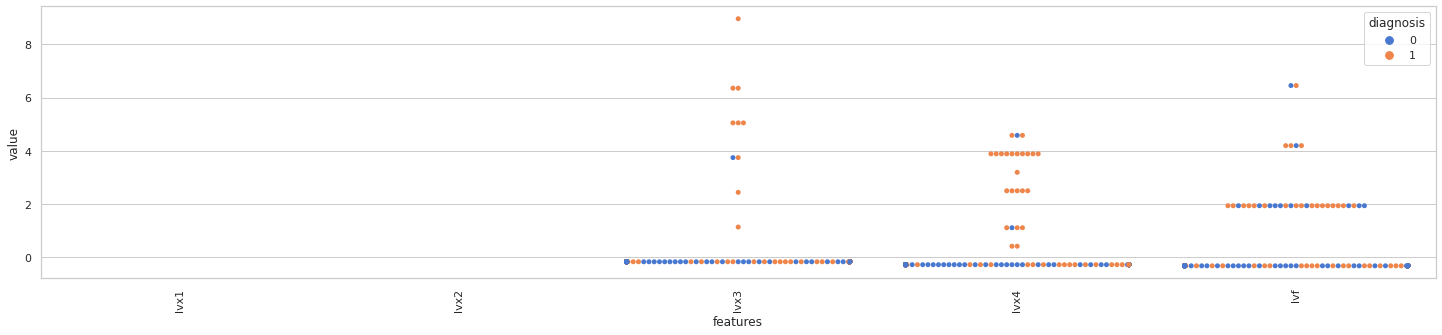

In [76]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = df
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y_df,data_n_2.iloc[:,50:]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(25,5))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

#### Heatmap (all features correlation)

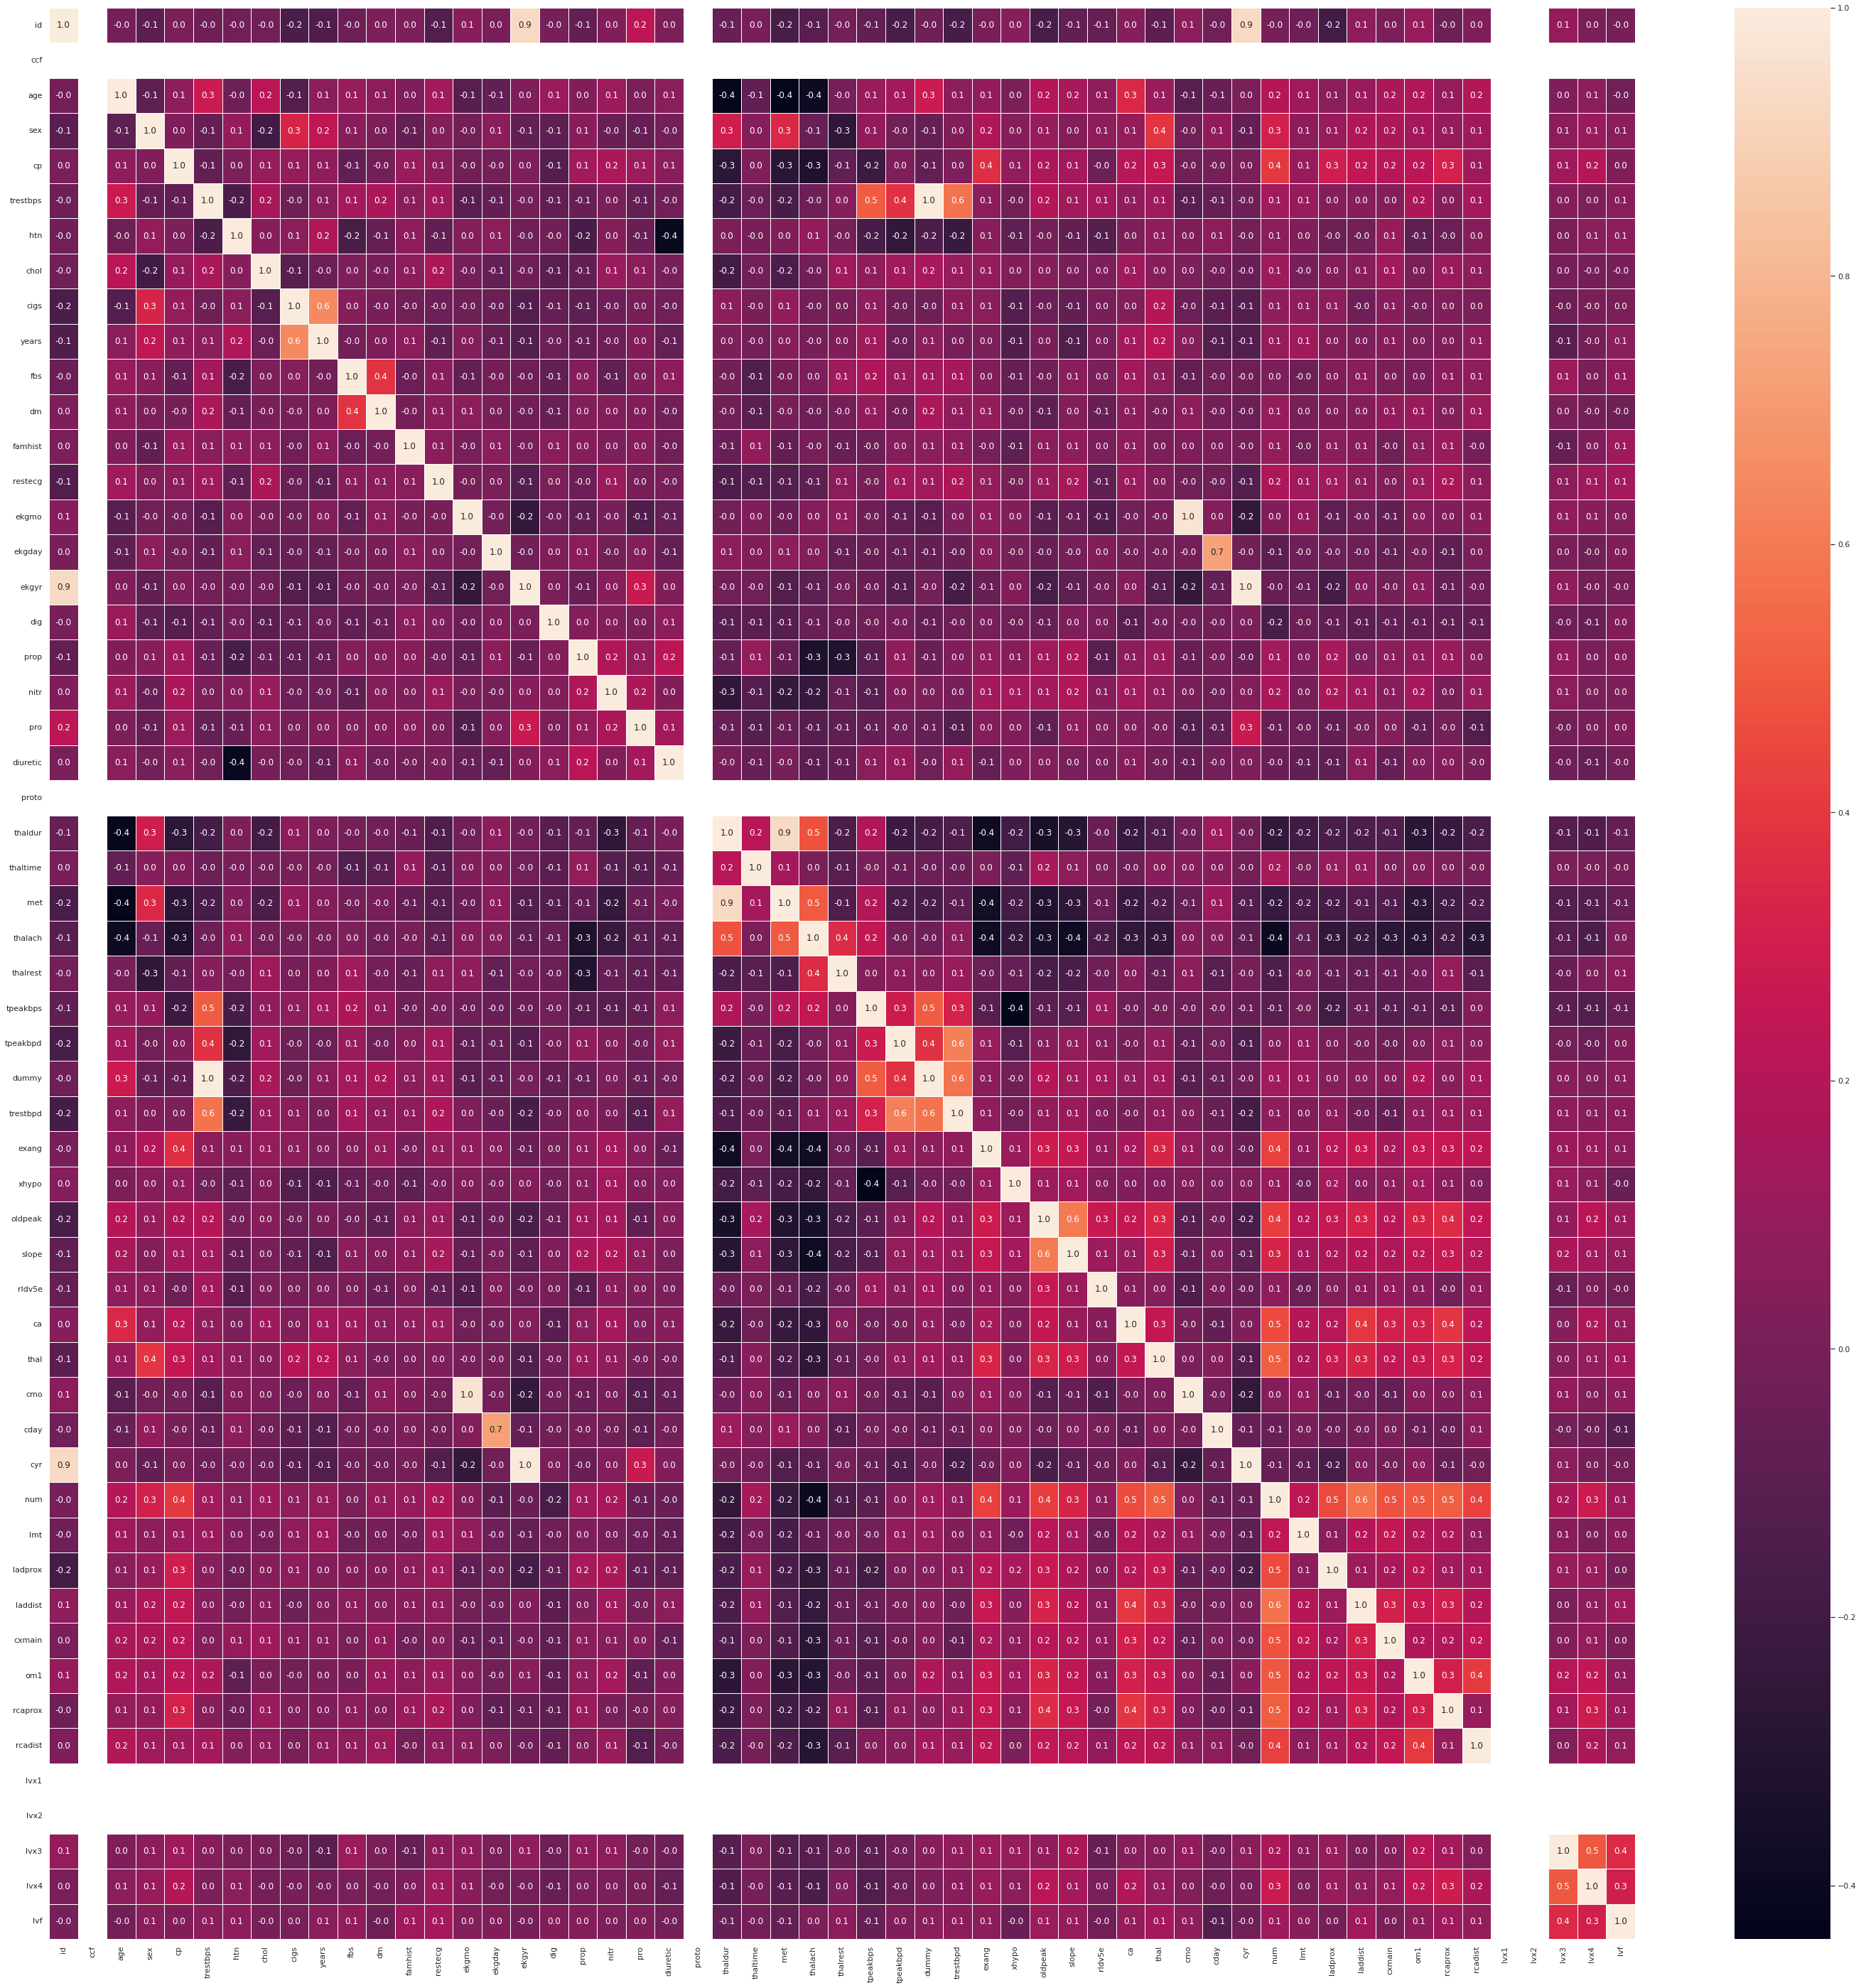

In [73]:
#correlation map
f,ax = plt.subplots(figsize=(50, 50))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.savefig('heatmap.png')